# PANDAS and Visualization

### 1. Read the two CSV files and then concatenate them
File paths are provided.
Check your dataframe with `df.head()`

In [351]:
import pandas as pd
import numpy as np
filepaths = ['data/fifa_19_part_one.csv','data/fifa_19_part_two.csv']

In [352]:
# CODE HERE
def get_fifa_data():
    '''
    inputs: none
    ----
    returns: combined dataframe
    '''
    return pd.concat(pd.read_csv(path) for path in filepaths)

In [353]:
df = get_fifa_data()
df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400


### 2. Check for duplicates
First, check how many rows are in the dataset, then check how many unique values are in the "ID" column.

In [354]:
#code here to see the size of the dataframe
df.shape

(20000, 88)

In [355]:
#code here to check number of unique ids
df.ID.nunique()

16643

### 3. Drop Duplicates
You should see 16,643 unique IDs, meaning there are 3357 duplicates.  Get rid of them by dropping duplicate rows.

In [356]:
#code here
df.drop_duplicates(inplace=True)

In [357]:
df.shape

(16643, 88)

<center><h1>4. DROP A NAN ROW</h1></center>

??????

### 5. Convert players' heights to inches. Replace the original height column.
First create a function, then use it on your dataframe. If it's `nan` then return `nan`.

In [359]:
#code here to write a helper function
def convert_height(height):
    split = height.split("'")
    return int(split[0])*12 + int(split[1])

In [360]:
#test here
convert_height("5'7")

67

In [361]:
#code here to use the function on the height column
df['Height'] = df.Height.apply(lambda x: convert_height(x))

### 6. Make histograms of 3 different continuous statistics
Bonus points for labeling axes and adding chart titles.

In [362]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


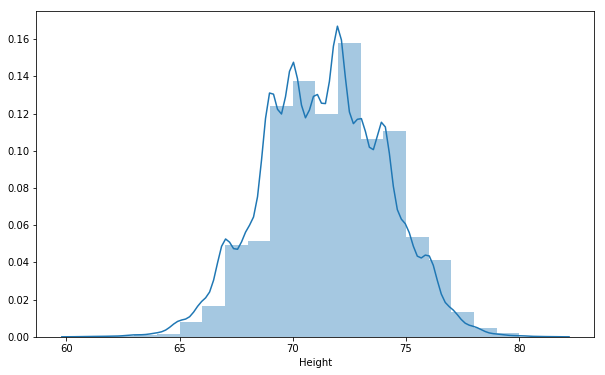

In [363]:
plt.subplots(figsize=(10,6))
sns.distplot(df.Height, bins=range(min(df.Height),max(df.Height)))

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


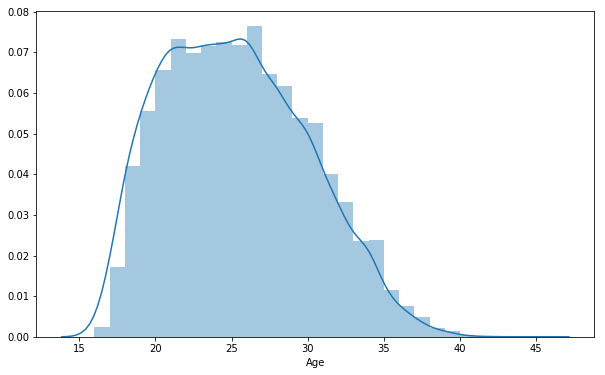

In [364]:
plt.subplots(figsize=(10,6))
sns.distplot(df.Age,bins=range(15,45))

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


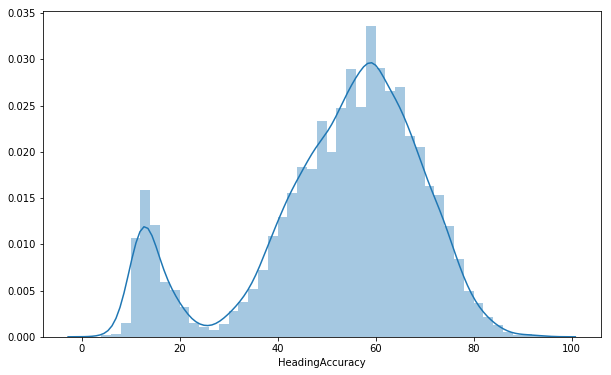

In [365]:
plt.subplots(figsize=(10,6))
sns.distplot(df.HeadingAccuracy,bins=range(0,100,2))

### 7. Make a bar chart for the 10 countries with the most players (by nationality)

In [366]:
#code here to get the top 10 countries with the most players
df.Nationality.value_counts()[0:10]

England        1475
Germany        1151
Spain           974
France          853
Argentina       833
Brazil          788
Italy           579
Colombia        570
Japan           455
Netherlands     426
Name: Nationality, dtype: int64

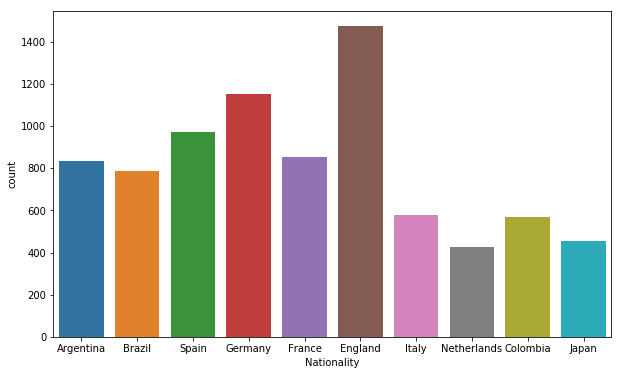

In [367]:
#code here to plot a bar chart
plt.subplots(figsize=(10,6))
sns.countplot(
    df.loc[
        df['Nationality'].isin(df.Nationality.value_counts()[0:10].keys())
    ]['Nationality'],
)

### 8. What is the difference between a bar chart and a histogram?

// answer here //

A bar chart shows quantities of different categories whereas histograms show distributions.

### 9. Make a scatter plot for the player stats StandingTackle and SlidingTackle

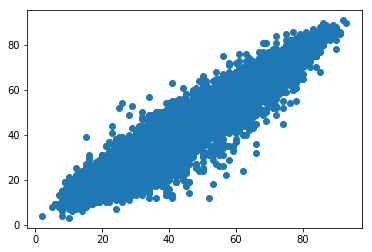

In [368]:
plt.scatter(df['StandingTackle'], df['SlidingTackle'])

# NUMPY and Statistics

We'll continue using the same FIFA 2019 dataset.

### 1. Convert the Release Clause Price from Euros to Dollars
Store in a new column release_clause_dollars
Do not use the `apply` method.
1.2 Dollars = 1 Euro.

In [369]:
df['release_clause_dollars'] = df['Release Clause'] * 1.2

### 2. Get summary statistics for all numeric columns
(Please don't do each column individually!)

In [372]:
df.describe()

,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Loaned From,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,release_clause_dollars
count,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,0.0,...,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000,1.664300e+04
mean,213845.010094,25.226221,66.162771,71.140900,1595.383404,1.114823,2.942919,2.349516,19.657213,NaN,...,47.328967,47.776302,45.751607,16.747521,16.515712,16.355765,16.503936,16.837409,228201.273629,2.738415e+05
std,30546.285826,4.716588,7.008236,6.151409,275.723076,0.398559,0.659933,0.755855,16.054811,NaN,...,19.937220,21.681809,21.295201,17.832273,17.033907,16.615668,17.151713,18.090985,299251.865865,3.591022e+05
min,16.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,NaN,...,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1000.000000,1.200000e+03
25%,199569.500000,21.000000,62.000000,67.000000,1452.000000,1.000000,3.000000,2.000000,8.000000,NaN,...,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000,2500.000000,3.000000e+03
50%,221493.000000,25.000000,66.000000,71.000000,1633.000000,1.000000,3.000000,2.000000,17.000000,NaN,...,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000,19800.000000,2.376000e+04
75%,236802.000000,29.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,NaN,...,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000,431000.000000,5.172000e+05
max,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,NaN,...,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000,999000.000000,1.198800e+06


### 3. What is the mean age and the median age?  What does each mean?

// answer here //

### 4. What is the standard deviation of "International Reputation"?  What does this tell you about the distribution of this variable, which is incremental from 1-5?

// answer here //

### 5. What are the covariance and correlation between blah and blah?  What is the difference between covariance and correlation?

In [377]:
#code here

// answer here //

### 6. Do a linear regression.
- y variable: Release Clause
- x variables: ???

In [ ]:
#code here